<a href="https://colab.research.google.com/github/fpant1/introtoaiworksheets/blob/main/ws1_solutions_linearregression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EMAT31530 Introduction to Artificial Intelligence
## Worksheet 1 Linear Regression
In this worksheet we will spend more time using one of the most popular Python libraries for regression and classification, scikit-learn. 

We will cover how to write Python functions, as well as how to use common features of the scikit-learn API.

### Import Data

The first task is to import a dataset to use. We will use one of the 'toy' datasets from scikit-learn (https://scikit-learn.org/stable/datasets/toy_dataset.html). Specifically we will use the 'boston' dataset, which you can see how to load below.

In [ ]:
# lets double check we have the right version of scikit-learn
!pip install scikit-learn==0.22.2.post1
from sklearn import datasets
boston = datasets.load_boston()

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 7.1 MB 7.9 MB/s 
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.0.2
    Uninstalling scikit-learn-1.0.2:
      Successfully uninstalled scikit-learn-1.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
yellowbrick 1.5 requires scikit-learn>=1.0.0, but you have scikit-learn 0.22.2.post1 which is incompatible.
imbalanced-learn 0.8.1 requires scikit-learn>=0.24, but you have scikit-learn 0.22.2.post1 which is incompatible.


It's always good to check the source of the data, why it was collected, and what it is intended to be used for. Here is a description of this dataset that we will be using below.


This dataset contains information collected by the U.S Census Service concerning housing in the area of Boston Mass. It was obtained from the StatLib archive (http://lib.stat.cmu.edu/datasets/boston), and has been used extensively throughout the literature to benchmark algorithms... The dataset is small in size with only 506 cases.

The data was originally published by Harrison, D. and Rubinfeld, D.L. `Hedonic prices and the demand for clean air', J. Environ. Economics & Management, vol.5, 81-102, 1978. 

https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html*



### Extracting data in X and y
The datset, according to the 'toy dataset' documentation keeps the features as a data property of the 'boston' object, and the class as the 'target' property. It's somewhat of a convention to use 'X' and 'y', so let's extract those out into 'X' and 'y' variables.

In [ ]:
X = boston.data
y = boston.target


There are 14 features, and the documentation provides us with some more information about what they mean.


```
0: CRIM - per capita crime rate by town
1: ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
2: INDUS - proportion of non-retail business acres per town.
3: CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
4: NOX - nitric oxides concentration (parts per 10 million)
5: RM - average number of rooms per dwelling
6: AGE - proportion of owner-occupied units built prior to 1940
7: DIS - weighted distances to five Boston employment centres
8: RAD - index of accessibility to radial highways
9: TAX - full-value property-tax rate per $10,000
10: PTRATIO - pupil-teacher ratio by town
11: B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
12: LSTAT - % lower status of the population
13: MEDV - Median value of owner-occupied homes in $1000's
```




What is not given here is the details of the 'target' or 'y' variable. The 'y' variable, what we want to predict, is the average house price.

### Predicting house prices with nitric oxides concentration
Let's first use the 'NOX' feature to attempt to learn a linear model to predict the house price.

From the introduction to python, numpy etc. document before, we covered how to extract columns from a numpy array. Since this is the first worksheet, I will help.

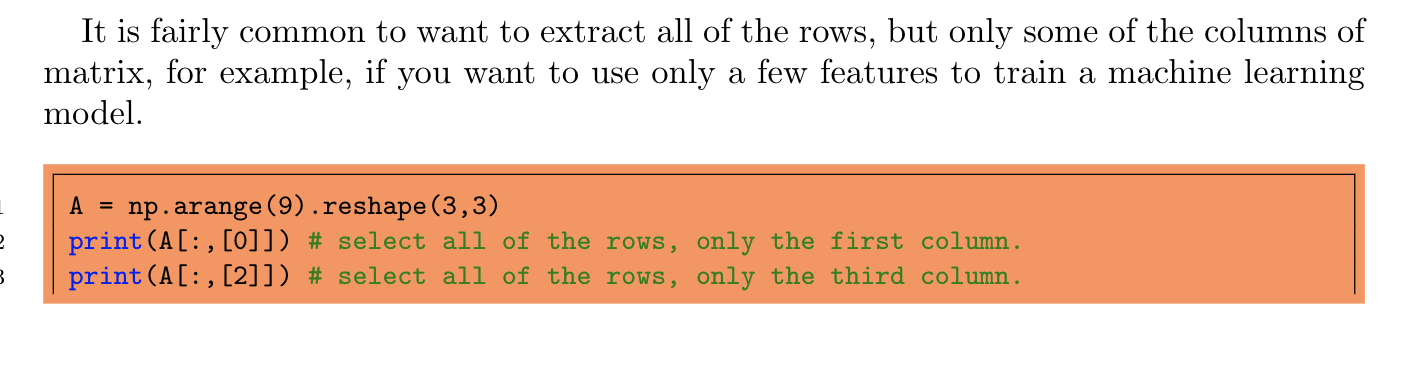

In [ ]:
nox = X[:,[4]]

It is always good to first visualise data. Given that it is numeric data, we can use the scatter visualisation within matplotlib.

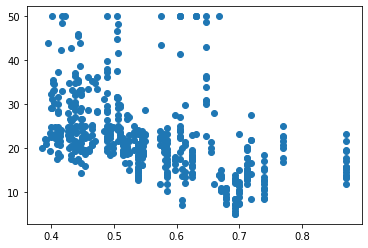

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(nox, y)

OK, we can see somewhat of a trend here. Areas with a large value of NOS tend to have lower prices. What about another feature? Let's look at the number of rooms (RM). Have a look at the list of features above, along with their index, and extract out the number of rooms. Once you do this, plot it as we done for the NOX feature.

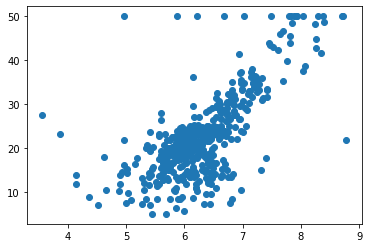

In [ ]:
num_rooms = X[:,[5]]
plt.scatter(num_rooms, y)

# Let's do some linear regression 
The trend here is more clear. However, lets apply linear regression to the each of these features, and see which is a better predictor.

We first want to import the LinearRegression model from scikit-learn. The scikit-learn documentation is pretty comphrenesive, so you should try and get familiar with it. You can see the documentation for the LinearRegression model here: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

### Importing the model

In [ ]:
from sklearn.linear_model import LinearRegression

### Training a Linear Regression model
The first step in training a model with scikit-learn is to import the 'instantiate' the model, that is, create an object that represents an instance of the model which you can use for training, predicting etc.

In [ ]:
model = LinearRegression()

Once you have created your model, you can call the 'fit' function on it. The fit function is available for all relevant models in scikit-learn, and what it does is trains your model on the supplied data. For a supervised model, you have to supply two arguments, the features and the labels associated with the features.

In this case, we want to train our model on the NOX feature to predict house prices. Fill in the fit variable below to do this.

In [ ]:
model.fit(nox, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Making predictions
Once you have fit the model to the data, you can use this model to make predictions. In this case, we will use our model to predict data that it was trained on. We will see in week 2 lectures how this isn't all that useful as in machine learning we care a lot about something called 'generalisation'. However, for now, we can take our trained (or fitted) model, give it some data and it will produce predictions.

In [ ]:
prediction = model.predict([[0.5]])
print(prediction)

[24.38784696]


In the above cell, we can see how we supply the model with two a single NOX value, 0.5, and the model produces a prediction of the house price given this NOX value.




**Task 4: Using the nox feature again, use the *model* to predict the price of each house given the corresponding nox value for that house.**

In [ ]:
predictions = model.predict(nox)
print("The first 5 predicted house values are %s" % predictions[:5])
print("The first 5 true house values are %s" % y[:5])

The first 5 predicted house values are [23.09903687 25.43924467 25.43924467 25.81232127 25.81232127]
The first 5 true house values are [24.  21.6 34.7 33.4 36.2]


Nonetheless, for now, we can produce some visusalisations to help us understand how well our model fit the data.

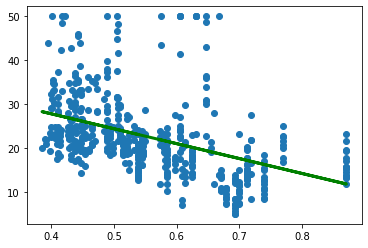

In [ ]:
plt.scatter(nox, y)
plt.plot(nox, predictions, color='green', linewidth=3)

We have a new line of code above, on line 2, plt.plot, which is responsible for producing the green line representing our predictions. This is helpful, we can see that hte model has captured the relationship between NOX value and house price.

Let's do the same for the number of rooms and see how it looks. So each step could be explained, the code to do this above is spread out over many cells. Take all of that code, put it in a Python function called 'produce_linear_plot' and produce a plot for the num_rooms feature. Have the function return the predictions made as well.

In [ ]:
def produce_linear_plot(x, y):
  model = LinearRegression()
  model.fit(x, y)
  predictions = model.predict(x)
  plt.scatter(x, y)
  plt.plot(x, predictions, color='green', linewidth=3)
  return predictions

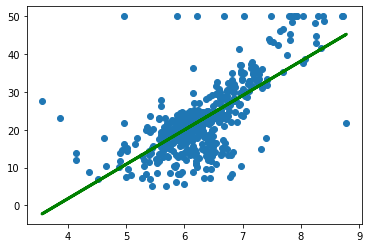

In [ ]:
num_rooms_predictions = produce_linear_plot(num_rooms, y)

# Quantifying how good the model is

Looking at visualisations is helpful, but often we want to quantify how well a model has fit our data. We can do that by calculating the mean squared error of our model, which is

$MSE ={\frac {1}{n}}\sum _{i=1}^{n}(y_{i}-{\hat {y_{i}}})^{2}$

where ${\hat {y_{i}}}$ is the prediction, and $y$ is the ground truth value, i.e., the true known value, and $n$ is the number of data points.

Helpfully, this is also implemented in scikit-learn. We can import it as follows.

In [ ]:
from sklearn.metrics import mean_squared_error

Look at the documentation for the mean_squared_error function (https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html) , and apply it below to calculate the mean squared error of your predictions.



In [ ]:
num_rooms_mse = mean_squared_error(y, num_rooms_predictions)
print('Mean squared error: %.2f' % num_rooms_mse )

Mean squared error: 43.60


You can use the produce_linear_plot function above to recalculate the predictions for the nox feature. Do so, and report the MSE of it.

Mean squared error: 69.00


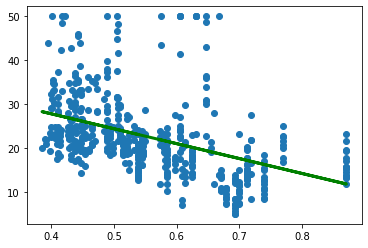

In [ ]:
nox_predictions = produce_linear_plot(nox, y)
nox_mse = mean_squared_error(y, nox_predictions)
print('Mean squared error: %.2f' % nox_mse )

Mean squared error: 43.60


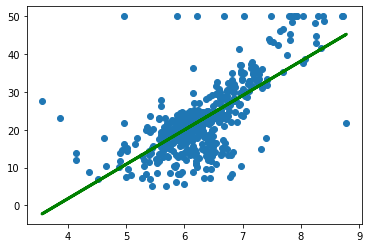

In [ ]:
nox_predictions = produce_linear_plot(num_rooms, y)
nox_mse = mean_squared_error(y, nox_predictions)
print('Mean squared error: %.2f' % nox_mse )

The MSE for the number of rooms is lower, which is telling us that it is a better predictor of the house price than the nox value.



What is the perfomance if you use *all* of the features?

In [ ]:
model = LinearRegression()
model.fit(X, y)
all_predictions = model.predict(X)
all_mse = mean_squared_error(y, all_predictions)
print('Mean squared error: %.2f' % all_mse )

Mean squared error: 21.89


# Next time

Next week we will extend what we have done so far to be more useful for real world machine learning taks. We will learn how we want to build a model on 'training data' such that it can accurately predict labels for 'test data'. Then we will also look beyond regression, and look at classification models where we want to predict a discrete label rather than a continuous label.